In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 2

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
7/9 [======================>.......] - ETA: 0s - loss: 0.6935 - accuracy: 0.5435
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 4s 124ms/step - loss: 0.6963 - accuracy: 0.5360 - val_loss: 0.6041 - val_accuracy: 0.6945
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6725 - accuracy: 0.5547
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 39ms/step - loss: 0.6532 - accuracy: 0.5985 - val_loss: 0.5613 - val_accuracy: 0.9568
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6328
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 0.6358 - accuracy: 0.6292 - val_loss: 0.5443 - val_accuracy: 0.9856
Epoch 4/1000
7/9 [======================>.......] - ETA: 0s - loss: 0.6396 - accuracy: 0.6194
Epoch 4: sa

9/9 [==============================] - 0s 20ms/step - loss: 0.3903 - accuracy: 0.8338 - val_loss: 0.1766 - val_accuracy: 0.9885
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.8047
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 0.3925 - accuracy: 0.8357 - val_loss: 0.1709 - val_accuracy: 0.9885
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8672
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.4214 - accuracy: 0.8108 - val_loss: 0.1692 - val_accuracy: 0.9856
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8125
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 25ms/step - loss: 0.3948 - accuracy: 0.8232 - val_loss: 0.

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.9219
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 0.3087 - accuracy: 0.8751 - val_loss: 0.1082 - val_accuracy: 0.9914
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8594
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.3057 - accuracy: 0.8722 - val_loss: 0.1066 - val_accuracy: 0.9914
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8750
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 0.2885 - accuracy: 0.8780 - val_loss: 0.1023 - val_accuracy: 0.9914
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8672
Epoch

1/9 [==>...........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.9062
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.2255 - accuracy: 0.9145 - val_loss: 0.0902 - val_accuracy: 0.9914
Epoch 84/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8984
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.2456 - accuracy: 0.9097 - val_loss: 0.0877 - val_accuracy: 0.9942
Epoch 85/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2052 - accuracy: 0.9219
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 0.2239 - accuracy: 0.9212 - val_loss: 0.0804 - val_accuracy: 0.9942
Epoch 86/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9141
Epoch 86: saving mo

1/9 [==>...........................] - ETA: 0s - loss: 0.1799 - accuracy: 0.9219
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.1883 - accuracy: 0.9376 - val_loss: 0.0627 - val_accuracy: 0.9942
Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1985 - accuracy: 0.9375
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 0.1722 - accuracy: 0.9452 - val_loss: 0.0612 - val_accuracy: 0.9942
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1784 - accuracy: 0.9375
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 0.1810 - accuracy: 0.9385 - val_loss: 0.0607 - val_accuracy: 0.9942
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2466 - accuracy: 0.9219
Epoch 113: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.0930 - accuracy: 0.9766
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 0.1483 - accuracy: 0.9481 - val_loss: 0.0588 - val_accuracy: 0.9942
Epoch 138/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1796 - accuracy: 0.9297
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 0.1713 - accuracy: 0.9433 - val_loss: 0.0752 - val_accuracy: 0.9914
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.0775 - accuracy: 0.9844
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 0.1559 - accuracy: 0.9597 - val_loss: 0.0826 - val_accuracy: 0.9885
Epoch 140/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1126 - accuracy: 0.9688
Epoch 140: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 7ms/step - loss: 0.0708 - accuracy: 0.9885


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 172ms/step
[0.9421419  0.05785818]
0


# Confusion matrix

11/11 [==============================] - 0s 10ms/step


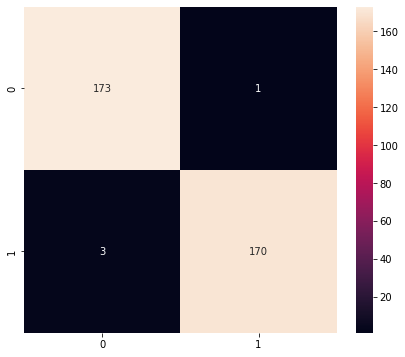

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       174
           1       0.99      0.98      0.99       173

    accuracy                           0.99       347
   macro avg       0.99      0.99      0.99       347
weighted avg       0.99      0.99      0.99       347



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MANOJK~1\AppData\Local\Temp\tmpiqbfbj5z\assets


6400

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9421418 0.0578582]
0
